<a href="https://colab.research.google.com/github/GeorgeShmelin/Masterschool_time_series_Project_supermarket_favorita/blob/main/4_time_series_prophet_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prophet doesn’t learn patterns based on IDs, even if they’re integers. It treats all extra columns as numeric features with real-world meaning (e.g., temperature, price, promotions). So passing store_nbr or item_nbr as integers will confuse the model — it will try to learn that higher store/item IDs cause more sales, which is meaningless.

Therefore, only for this prophet model I choosing only 1 most popular Favorita supermarket and modeling daily transactions vs weekday, holidays, oil price, etc

# Libraries

In [1]:
# !pip install kagglehub
import kagglehub

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sqlite3
import os
import gc

In [4]:
import sqlalchemy as sa
from google.colab import files
from sqlalchemy import text
from sqlalchemy import create_engine

# Data download and initial transformations

In [5]:
# Download latest version
path = kagglehub.dataset_download("siliconx/favoritagrocerysalesforecastingextracted")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/favoritagrocerysalesforecastingextracted


In [6]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['oil.csv', 'items.csv', 'sample_submission.csv', 'holidays_events.csv', 'stores.csv', 'train.csv', 'test.csv', 'transactions.csv']


In [7]:
# Connect to SQLite
conn = sqlite3.connect("favorita.db")

# Change this line per file
filename = 'oil.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'oil.csv' into table 'oil'
🔢 Table 'oil' has 1,218 rows.
🔑 Candidate keys or join fields in 'oil': ['date']


In [8]:
# Change this line per file
filename = 'items.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'items.csv' into table 'items'
🔢 Table 'items' has 4,100 rows.
🔑 Candidate keys or join fields in 'items': ['item_nbr']


In [9]:
# Change this line per file
filename = 'holidays_events.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'holidays_events.csv' into table 'holidays_events'
🔢 Table 'holidays_events' has 350 rows.
🔑 Candidate keys or join fields in 'holidays_events': ['date']


In [10]:
# Set up file
filename = 'stores.csv'
file_path = os.path.join(path, filename)

# Load and filter for Guayas
df = pd.read_csv(file_path)
# df = df[df['state'] == 'Guayas']  # 👈 Filter

table_name = filename.replace('.csv', '')

# Save to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}' (only state = 'Guayas')")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for join keys
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'stores.csv' into table 'stores' (only state = 'Guayas')
🔢 Table 'stores' has 54 rows.
🔑 Candidate keys or join fields in 'stores': ['store_nbr']


In [11]:
# Change this line per file
filename = 'transactions.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'transactions.csv' into table 'transactions'
🔢 Table 'transactions' has 83,488 rows.
🔑 Candidate keys or join fields in 'transactions': ['store_nbr', 'date']


In [12]:
del files
del possible_keys
del columns
del date_like
del primary_like
del df
del row_count_df
del query

this time period, because of oil price significant fluctuation, is more interesting and challenging rather than suggested initially

In [13]:
# Paths and file setup
filename = 'train.csv'
file_path = os.path.join(path, filename)
table_name = filename.replace('.csv', '')

# Date filter range
# DATE_START = '2015-09-15'
# DATE_END = '2017-04-01'

# Sampling + row cap
SAMPLE_RATIO = 0.5
MAX_ROWS = 500_000
total_saved_rows = 0

# Columns to keep from CSV
columns_to_keep = ['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion']

In [14]:
# Connect to SQLite
conn = sqlite3.connect("favorita.db")
cursor = conn.cursor()

# Check if the table exists
cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}'")
table_exists = cursor.fetchone()

# If not exists, create it with correct schema
if not table_exists:
    create_sql = f"""
        CREATE TABLE {table_name} (
            date DATETIME,
            store_nbr INTEGER,
            item_nbr INTEGER,
            unit_sales REAL,
            onpromotion INTEGER
        )
    """
    conn.execute(create_sql)
    print(f"✅ Created table '{table_name}' with all expected columns")
else:
    # Validate column schema
    cursor.execute(f"PRAGMA table_info({table_name})")
    existing_columns = [col[1] for col in cursor.fetchall()]
    if 'onpromotion' not in existing_columns:
        try:
            conn.execute(f"ALTER TABLE {table_name} ADD COLUMN onpromotion INTEGER")
            print(f"➕ Added missing column 'onpromotion' to '{table_name}'")
        except sqlite3.OperationalError as e:
            print(f"⚠️ Could not alter table to add 'onpromotion': {e}")
    else:
        print(f"ℹ️ Table '{table_name}' exists and includes 'onpromotion'")

ℹ️ Table 'train' exists and includes 'onpromotion'


In [15]:
# Paths and file setup
filename = 'train.csv'
file_path = os.path.join(path, filename)
table_name = filename.replace('.csv', '')

# Date filter range
DATE_START = '2014-01-15' # Uncommented to define the start date
DATE_END = '2019-04-01'   # Uncommented to define the end date

# Sampling + row cap
SAMPLE_RATIO = 0.9
MAX_ROWS = 500_000
total_saved_rows = 0

# Columns to keep from CSV
columns_to_keep = ['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion']

In [16]:
# Paths and file setup
filename = 'train.csv'
file_path = os.path.join(path, filename)
table_name = filename.replace('.csv', '')

# Date filter range
# DATE_START = '2015-09-15'
# DATE_END = '2017-04-01'

# Sampling + row cap
# SAMPLE_RATIO = 0.5
# MAX_ROWS = 500_000
total_saved_rows = 0

# Columns to keep from CSV
columns_to_keep = ['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion']

# Connect to SQLite
conn = sqlite3.connect("favorita.db")
cursor = conn.cursor()

# Check if the table exists
cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}'")
table_exists = cursor.fetchone()

# If not exists, create it with correct schema
if not table_exists:
    create_sql = f"""
        CREATE TABLE {table_name} (
            date DATETIME,
            store_nbr INTEGER,
            item_nbr INTEGER,
            unit_sales REAL,
            onpromotion INTEGER
        )
    """
    conn.execute(create_sql)
    print(f"✅ Created table '{table_name}' with all expected columns")
else:
    # Validate column schema
    cursor.execute(f"PRAGMA table_info({table_name})")
    existing_columns = [col[1] for col in cursor.fetchall()]
    if 'onpromotion' not in existing_columns:
        try:
            conn.execute(f"ALTER TABLE {table_name} ADD COLUMN onpromotion INTEGER")
            print(f"➕ Added missing column 'onpromotion' to '{table_name}'")
        except sqlite3.OperationalError as e:
            print(f"⚠️ Could not alter table to add 'onpromotion': {e}")
    else:
        print(f"ℹ️ Table '{table_name}' exists and includes 'onpromotion'")

# Read train.csv in chunks
chunksize = 100_000  # Define a suitable chunk size
with pd.read_csv(file_path, chunksize=chunksize, usecols=columns_to_keep) as reader:
    for chunk in reader:
        # Process the chunk
        chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')
        chunk['unit_sales'] = pd.to_numeric(chunk['unit_sales'], downcast='float')
        if chunk['unit_sales'].max() < 65504:
            chunk['unit_sales'] = chunk['unit_sales'].astype('float16')

        # Optionally filter by date and apply sampling/row cap if needed
        # if 'date' in chunk.columns:
        #     chunk['date'] = pd.to_datetime(chunk['date'])
        #     chunk = chunk[(chunk['date'] >= DATE_START) & (chunk['date'] <= DATE_END)]

        # Apply sampling and row cap
        # if SAMPLE_RATIO < 1.0:
        #     chunk = chunk.sample(frac=SAMPLE_RATIO, replace=False, random_state=42)
        # if total_saved_rows + len(chunk) > MAX_ROWS:
        #     chunk = chunk.sample(n=MAX_ROWS - total_saved_rows, replace=False, random_state=42)

        # Load to SQL
        chunk.to_sql(table_name, conn, if_exists="append", index=False)
        total_saved_rows += len(chunk)

        # Stop if row cap is reached
        if total_saved_rows >= MAX_ROWS:
            print(f"✅ Reached row cap of {MAX_ROWS:,}.")
            break

        print(f"✅ Loaded {len(chunk):,} rows from chunk into table '{table_name}'")

print(f"✅ Total rows loaded into table '{table_name}': {total_saved_rows:,}")

ℹ️ Table 'train' exists and includes 'onpromotion'


<ipython-input-16-349a832a34ca>:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')


✅ Loaded 100,000 rows from chunk into table 'train'


<ipython-input-16-349a832a34ca>:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')


✅ Loaded 100,000 rows from chunk into table 'train'


<ipython-input-16-349a832a34ca>:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')


✅ Loaded 100,000 rows from chunk into table 'train'


<ipython-input-16-349a832a34ca>:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')


✅ Loaded 100,000 rows from chunk into table 'train'


<ipython-input-16-349a832a34ca>:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')


✅ Reached row cap of 500,000.
✅ Total rows loaded into table 'train': 500,000


In [17]:
# Row count
row_count = pd.read_sql(f"SELECT COUNT(*) AS row_count FROM {table_name}", conn).iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Keys for join
sample = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 5", conn)
columns = sample.columns.tolist()
keys = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower() or 'date' in col.lower()]
print(f"🔑 Candidate keys or join fields in '{table_name}': {keys}")

🔢 Table 'train' has 3,100,000 rows.
🔑 Candidate keys or join fields in 'train': ['date', 'store_nbr', 'item_nbr']


In [18]:
# del cursor
del row_count
del sample
del keys
del columns

## From SQL to DataFrame

In [19]:
database_connection_string = "sqlite:///favorita.db"  # Assuming the database file is named 'favorita.db'

# Create the engine
engine = sa.create_engine(database_connection_string)

In [20]:
query_download = """
WITH top_store AS (
    SELECT store_nbr
    FROM train
    WHERE unit_sales >= 0
    GROUP BY store_nbr
    ORDER BY SUM(unit_sales) DESC
    LIMIT 1
)

SELECT
    train.unit_sales,
    train.date AS train_date,
    train.store_nbr,
    train.item_nbr,
    train.onpromotion,

    oil.dcoilwtico,

    holidays_events.type AS holiday_type,
    holidays_events.locale,
    holidays_events.transferred,

    stores.city,
    stores.type AS store_type,
    stores.cluster AS store_cluster,

    items.family AS items_family,
    items.class AS item_class,
    items.perishable AS perishable_items,

    transactions.transactions

FROM train

LEFT JOIN oil
  ON DATE(train.date) = DATE(oil.date)
LEFT JOIN holidays_events
  ON DATE(train.date) = DATE(holidays_events.date)
INNER JOIN stores
  ON train.store_nbr = stores.store_nbr
INNER JOIN items
  ON train.item_nbr = items.item_nbr
INNER JOIN transactions
  ON DATE(train.date) = DATE(transactions.date)
     AND train.store_nbr = transactions.store_nbr

WHERE train.unit_sales >= 0
  AND train.store_nbr = (SELECT store_nbr FROM top_store)

LIMIT 1000000;
"""

In [21]:
df_download = pd.read_sql_query(query_download, engine)

In [22]:
df = df_download.copy()
df.shape

(86153, 16)

In [23]:
gc.collect() # rubbish collection

0

## Data cleaning and transforming

In [24]:
df.sample(3)

,unit_sales,train_date,store_nbr,item_nbr,onpromotion,dcoilwtico,holiday_type,locale,transferred,city,store_type,store_cluster,items_family,item_class,perishable_items,transactions
2456,21.0,2015-09-25 00:00:00,44,1225768,0,45.55,None,None,NaN,Quito,A,5,GROCERY I,1016,0,4283
75816,19.0,2013-01-05,44,802831,0,NaN,Work Day,National,0.0,Quito,A,5,GROCERY I,1045,0,4921
59516,13.0,2013-01-04,44,577741,0,93.12,None,None,NaN,Quito,A,5,GROCERY I,1032,0,4169


I need to know which exactly store and city I consider here, further I can delete the column in order not to confuse my model

In [25]:
del df['store_nbr']
del df['city']

In [26]:
del df['holiday_type'] # same

In [27]:
del df['store_type'] # same
del df['store_cluster']
del df['items_family']
del df['item_class']

In [28]:
df['date'] = pd.to_datetime(df['train_date'], errors='coerce')
del df['train_date']

In [29]:
df['locale'].unique()

array([None, 'Local', 'National'], dtype=object)

In [30]:
df['is_holiday'] = df['locale'].isin(['Local', 'National']).astype(int)
del df['locale']

effect of perishable, as sales of a perishable item has 1.5 weight

In [31]:
df['perishable_items'] = df['perishable_items'].fillna(0).astype(bool)
df['weighted_unit_sales'] = df['unit_sales']  # Create a copy of 'unit_sales'

# Apply the weight where 'perishable_items' is True/1
df.loc[df['perishable_items'] == 1, 'weighted_unit_sales'] *= 1.5

In [32]:
del df['unit_sales']
del df['perishable_items']

In [33]:
# df['is_real_holiday'] = ((df['is_holiday'] == 1) & (df['transferred'] == 0)).astype(int)
df['transferred'] = df['transferred'].fillna(False).astype(int)

In [34]:
df.sample(3)

,item_nbr,onpromotion,dcoilwtico,transferred,transactions,date,is_holiday,weighted_unit_sales
41892,311994,0,93.14,0,4821,NaT,0,100.40625
23223,108698,0,44.53,0,4089,2015-09-23,0,22.50000
72313,938576,0,93.14,0,4821,NaT,0,12.00000


Prophet treats NaN in regressors as missing values and drops the row from training.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86153 entries, 0 to 86152
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   item_nbr             86153 non-null  int64         
 1   onpromotion          86153 non-null  int64         
 2   dcoilwtico           61830 non-null  float64       
 3   transferred          86153 non-null  int64         
 4   transactions         86153 non-null  int64         
 5   date                 41645 non-null  datetime64[ns]
 6   is_holiday           86153 non-null  int64         
 7   weighted_unit_sales  86153 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 5.3 MB


Initial Data review

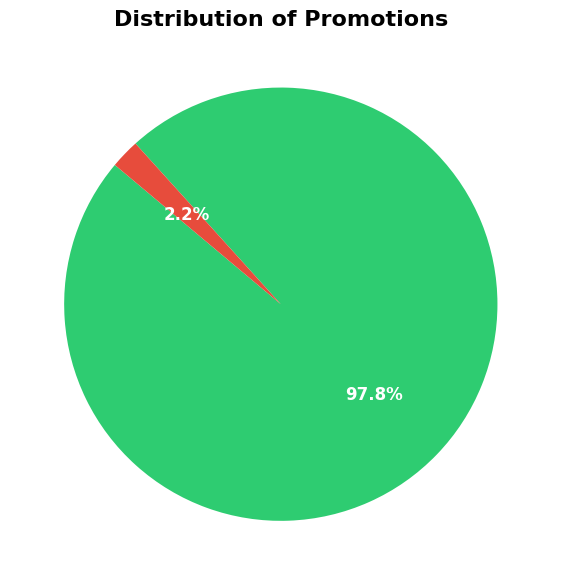

In [36]:
onpromotion_counts = df['onpromotion'].value_counts(dropna=False)

# Custom labels
labels = ['Promoted' if val == True else 'Not Promoted' if val == False else 'Missing' for val in onpromotion_counts.index]

# Custom colors
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # green, red, gray

# Create the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    onpromotion_counts,
    labels=labels,
    colors=colors[:len(onpromotion_counts)],
    autopct='%1.1f%%',
    startangle=140,
    textprops=dict(color="white")
)

# Styling
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=12)
plt.title('Distribution of Promotions', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

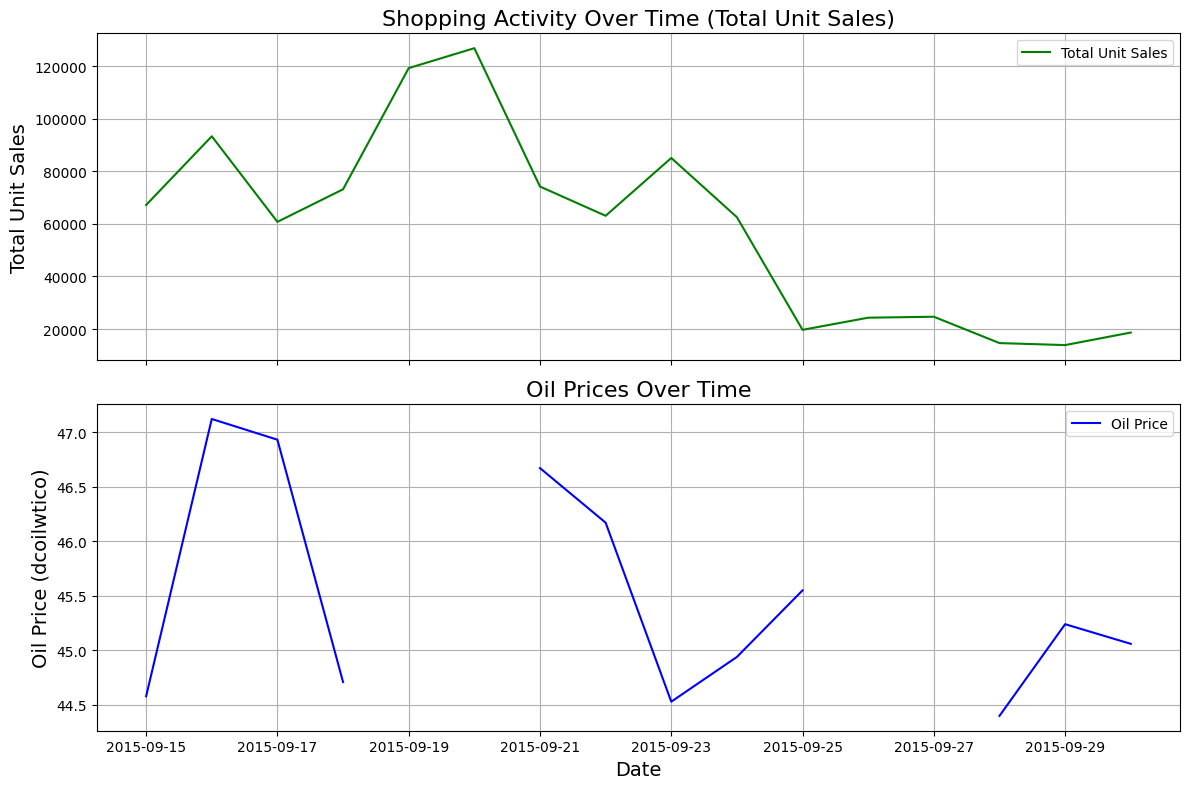

In [37]:
# Sort by date
df = df.sort_values('date')

# Group total unit_sales per day
sales_per_day = df.groupby('date')['weighted_unit_sales'].sum()

# Create two vertically stacked plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top plot: Total unit sales over time
ax1.plot(sales_per_day.index, sales_per_day.values, color='green', label='Total Unit Sales')
ax1.set_title('Shopping Activity Over Time (Total Unit Sales)', fontsize=16)
ax1.set_ylabel('Total Unit Sales', fontsize=14)
ax1.legend()
ax1.grid(True)

# Bottom plot: Oil prices over time
ax2.plot(df['date'], df['dcoilwtico'], color='blue', label='Oil Price')
ax2.set_title('Oil Prices Over Time', fontsize=16)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Oil Price (dcoilwtico)', fontsize=14)
ax2.legend()
ax2.grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()

# save my csv file in my Google Drive directory

In [38]:
df.shape

(86153, 8)

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
file_path = '/content/drive/MyDrive/MasterSchool/MasterSchool_Python/Time_Series/Time_series_project/df_train_4.csv'
df.to_csv(file_path, index=False)